# Lesson 05 Assignement
# Houda Aynaou

## Workplace Scenario

Cypress from New Ventures Department has found a banking client who wants to do a targeted marketing campaign for a specialty investment product to some of its customers. Cypress stresses that the bank only wants to spend the effort on customers who are likely to say yes; last year they used a different company to generate an algorithm and ended up spamming many of their customers with products they didn't want.

Now that you know a few ensemble models to improve a classification model let's try it out in this assignment.

## To do: 
Create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:

1. Read in, parse, and pre-process the data
2. Perform a brief exploratory analysis
3. Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
4. Graph the structure of your decision tree
5. Graph the confusion matrix of your random forest model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 1. Data

In [2]:
LINK = 'https://raw.githubusercontent.com/houdaaynaou/DS-Certificate-UW/master/Course%203%20Machine%20Learning%20Techniques/Data/Bank%20Data.csv'
bank_data = pd.read_csv(LINK)
bank_data.head()


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [3]:
bank_data.shape

(600, 11)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    int64  
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB


In [5]:
# Check for missing variables

bank_data.isnull().sum()

age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

In [6]:
bank_data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


## 2. EDA

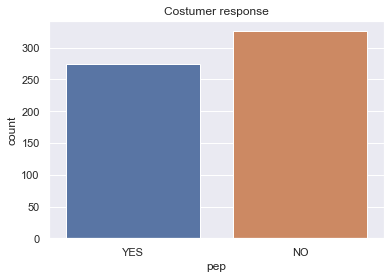

In [7]:
# Customer response plot:
sns.set()
_ = sns.countplot(x= 'pep', data= bank_data);
_ = plt.title('Costumer response')
plt.show()

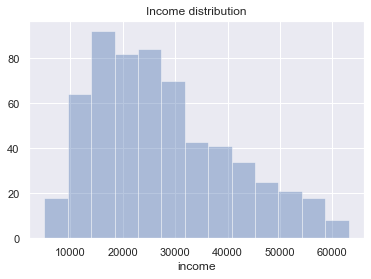

In [8]:
# Plot Income distribution 

sns.distplot(bank_data.income, kde= False)
plt.title('Income distribution'); 

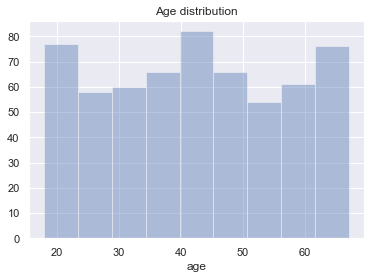

In [9]:
sns.distplot(bank_data.age, kde= False)
plt.title('Age distribution'); 

The income distribution has a positive skew.

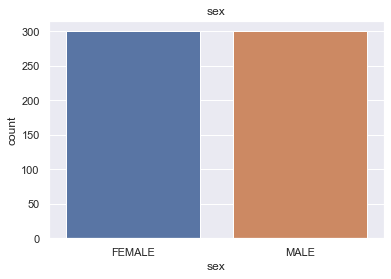

In [10]:
# Sex plot 

sns.set()
_ = sns.countplot(x= 'sex', data= bank_data);
_ = plt.title('sex')
plt.show()

The data has equal sample of of males and females customers.

## 3. Data pre processing:

In [11]:
# Split the data into train and test set
features = bank_data.drop('pep', axis= 1)
target = bank_data.pep

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)


In [12]:
# Get categorical column 'sex', 'region'

handle = 'return_nan'
# use one-hot encoding to encode two categorical features
enc = ce.OneHotEncoder(return_df= True, cols=['sex', 'region'], 
                       handle_missing= handle,
                      handle_unknown= handle)
enc.fit(X_train)

# transform the train dataset
X_train_encoded = enc.transform(X_train)

# transform the test dataset
X_test_encoded = enc.transform(X_test)

In [13]:
# Transform to binary: 

binary = ['married','car', 'save_act', 'current_act', 'mortgage']

# use binary encoding to encode two categorical features

binary_en = ce.BinaryEncoder(return_df = True, cols=binary)
binary_en.fit(X_train_encoded)

# transform train
X_train_transformed = binary_en.transform(X_train_encoded)

# transform test data
X_test_transformed = binary_en.transform(X_test_encoded)


## 3. Decison tree and Random forest models

### 3.1. Decison Tree 


In [14]:
# Decision tree with Geni coefficient
gini_tree = DecisionTreeClassifier(criterion= 'gini', random_state= 42)
gini_tree.fit(X_train_transformed, y_train)

# Predictions
tree_pred = gini_tree.predict(X_test_transformed)
 
# Model performance
confusion_matrix(y_test, tree_pred)

array([[85, 13],
       [17, 83]])

In [15]:
print('Out of 100 YES 83 were correcly classified and out of 98 NO 85 were correctly classified.')

Out of 100 YES 83 were correcly classified and out of 98 NO 85 were correctly classified.


### 3.2. Random Forest


In [16]:
from sklearn.ensemble import RandomForestClassifier

hypers = {"n_estimators": 1000, "max_features": "sqrt",}
clf_rf = RandomForestClassifier(random_state = 0, verbose = True, **hypers)


In [17]:
# training random forest classifier
clf_rf.fit(X_train_transformed, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=True,
            warm_start=False)

In [18]:
len(clf_rf.feature_importances_)

21

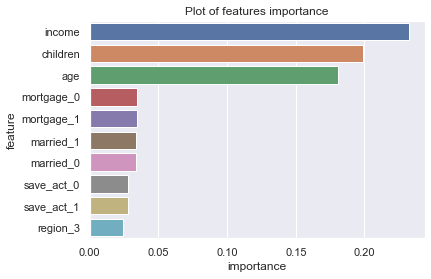

In [19]:
# plotting feature importance of Random forest classfier

# Create feature importance data frame:
df_var_imp = pd.DataFrame({"feature": X_train_transformed.columns, 
                           "importance": clf_rf.feature_importances_})

# Sort by value of importance
df_var_imp.sort_values(by = "importance", ascending = False, inplace = True)

# plot 
ax = sns.barplot(x = "importance", y = "feature", data = df_var_imp.head(10))
plt.title('Plot of features importance');
plt.show()

In [20]:
# Predictions: 

pred_rf= clf_rf.predict(X_test_transformed)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


### 3.3. Comparing performance of Decision Tree and Random forest



In [21]:
from sklearn.metrics import accuracy_score

# Desicion tree accuracy
acc_decision_tree = accuracy_score(y_test, tree_pred)
print('Accuracy of decison tree is {}'.format(acc_decision_tree))

# Random forest Accuracy
acc_random_forest = accuracy_score(y_test, pred_rf)
print('Accuracy of random forest is {}'.format(acc_random_forest))

Accuracy of decison tree is 0.8484848484848485
Accuracy of random forest is 0.8181818181818182


Looking at the accuracy mesure shows that decision tree performed better than random forest but we need to look at confusion metrix for further details.

## 4. Decision Tree graph

In [22]:
from sklearn.tree import export_graphviz
from graphviz import render

export_graphviz(gini_tree,'gini_tree_graph.dot', feature_names = list(X_train_transformed.columns))

render('dot', 'png', 'gini_tree_graph.dot')


'gini_tree_graph.dot.png'

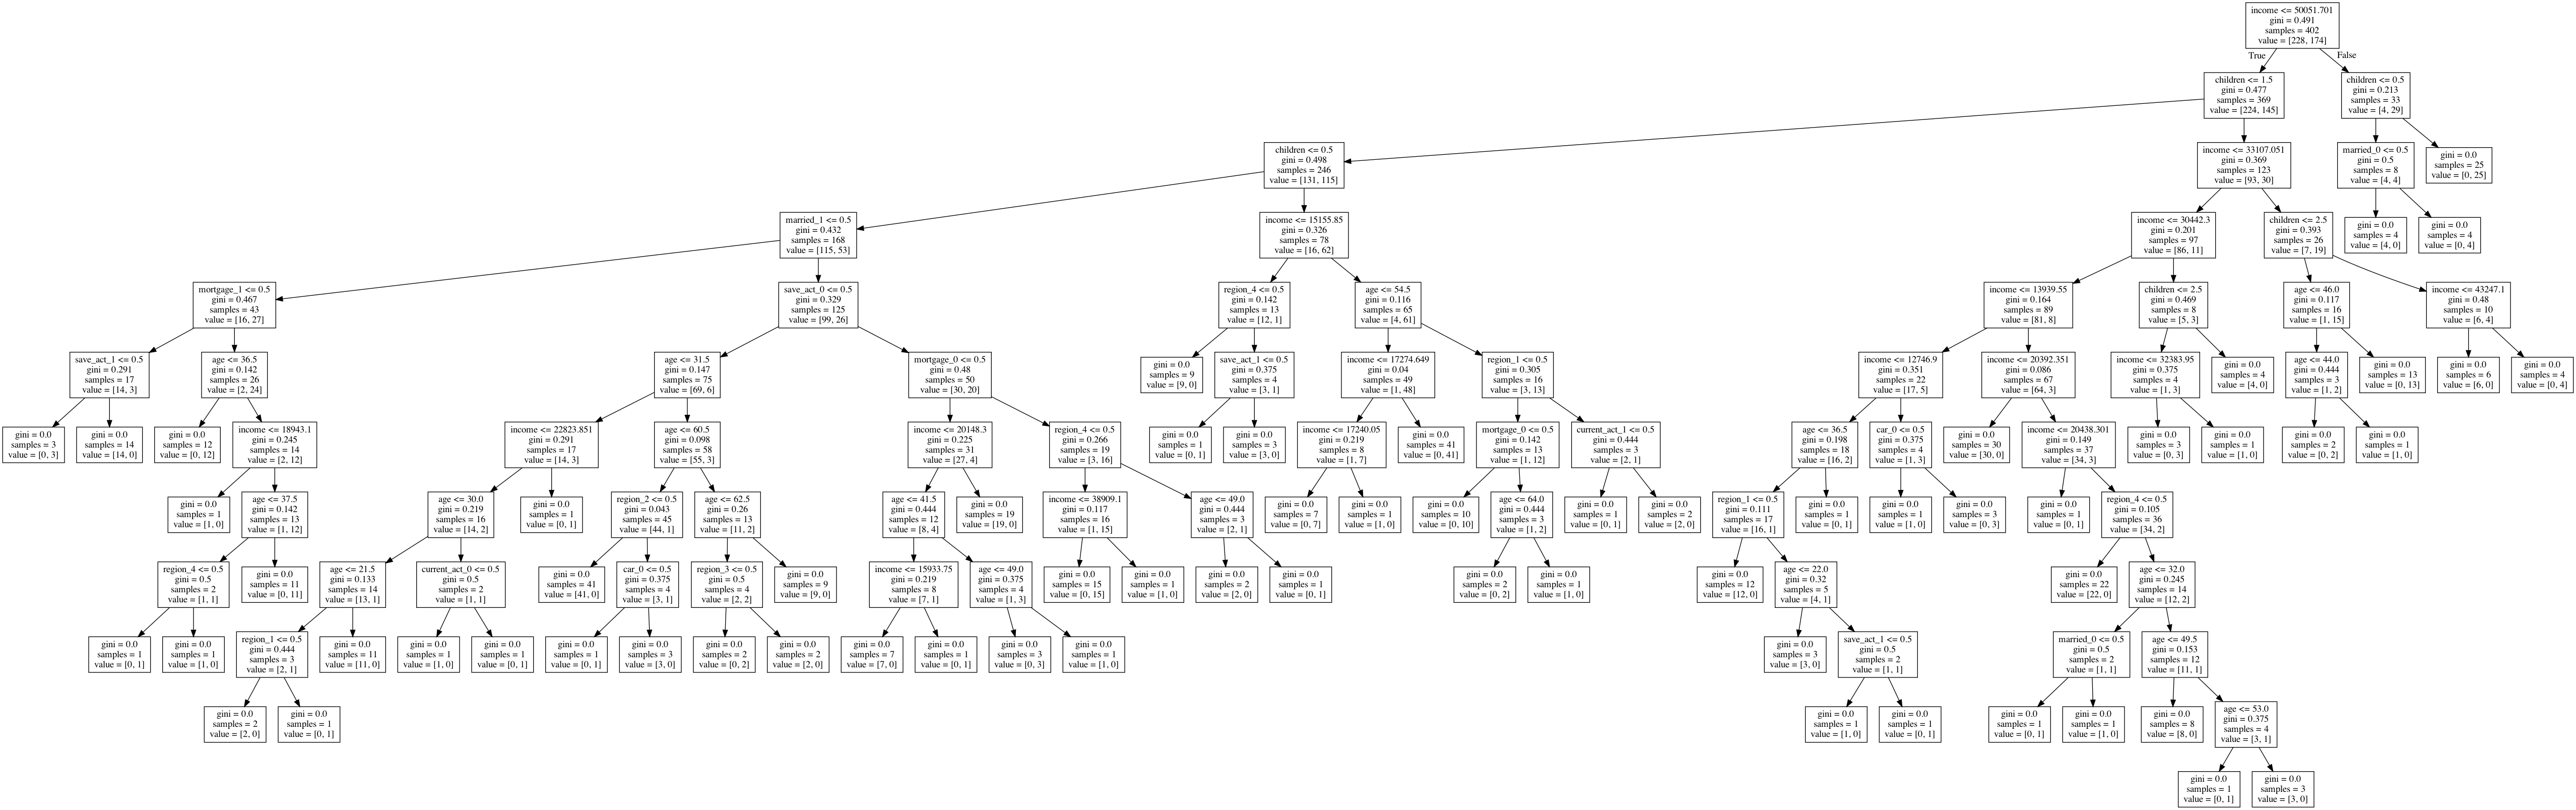

In [23]:
from IPython.display import Image
Image('gini_tree_graph.dot.png')

## 5. Random Forest confusion metrix

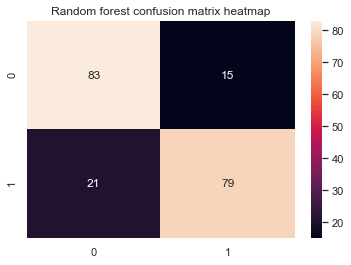

In [24]:
# plot confusing matrix heatmap
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, )
plt.title('Random forest confusion matrix heatmap');

In [27]:
print('Looking at the confusion matrix of random forest, we notice that desision tree out performed, Out of 100 YES 79 were correcly classified and out of 98 NO 83 were correctly classified comparing to decison tree performance Out of 100 YES 83 were correcly classified and out of 98 NO 85 were correctly classified')

Looking at the confusion matrix of random forest, we notice that desision tree out performed, Out of 100 YES 79 were correcly classified and out of 98 NO 83 were correctly classified comparing to decison tree performance Out of 100 YES 83 were correcly classified and out of 98 NO 85 were correctly classified
